In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Check the shapes of the data
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [ ]:
# Class names corresponding to the CIFAR-10 labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
# Function to visualize a few examples from the training dataset
def plot_sample_images(x, y, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i][0]])
    plt.show()

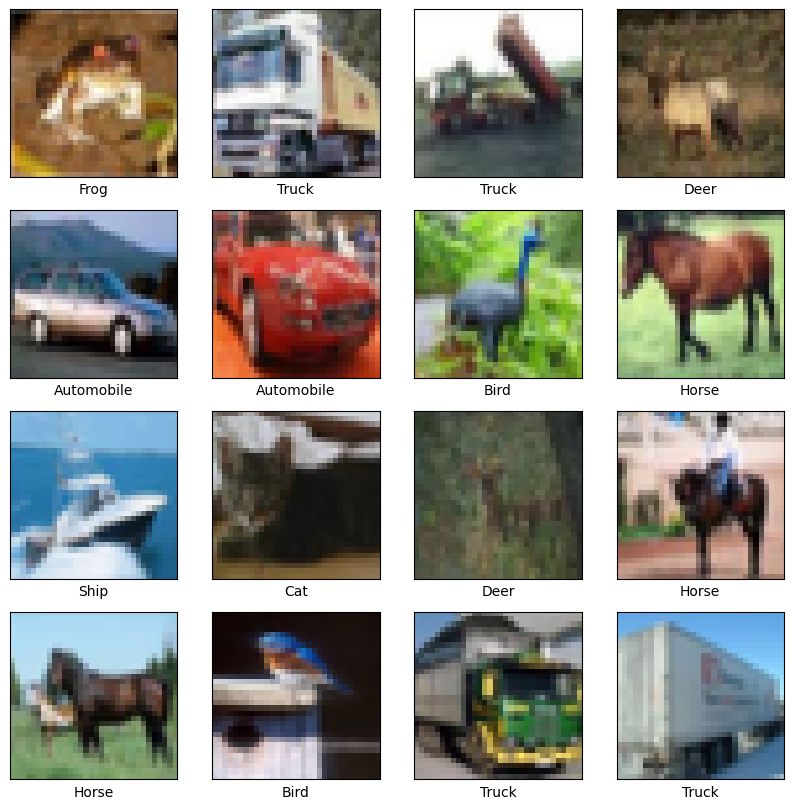

In [ ]:
# Visualize training samples
plot_sample_images(x_train, y_train, class_names)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Fit the generator on the training data
datagen.fit(x_train)

In [ ]:
# Building the CNN model
model = models.Sequential()

In [ ]:
# First Convolutional Block: Conv -> ReLU -> MaxPool
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Third Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# Flatten the output and add Fully Connected (Dense) layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

In [ ]:
# Adding Dropout to prevent overfitting
model.add(layers.Dropout(0.5))

In [ ]:
# Output layer: 10 neurons (one for each class) with softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Train the model using the data generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=3,
                    validation_data=(x_test, y_test))

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.3944 - loss: 1.6589 - val_accuracy: 0.4949 - val_loss: 1.3953
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 122ms/step - accuracy: 0.4291 - loss: 1.5784 - val_accuracy: 0.5224 - val_loss: 1.3309
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 120ms/step - accuracy: 0.4542 - loss: 1.5174 - val_accuracy: 0.5465 - val_loss: 1.2616


In [39]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 3s - 11ms/step - accuracy: 0.5465 - loss: 1.2616

Test accuracy: 0.5465


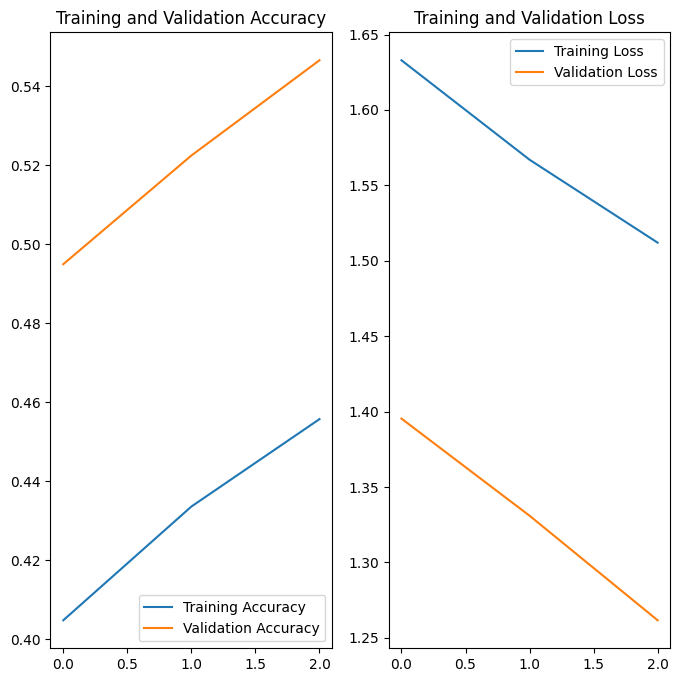

In [49]:
# Function to plot training and validation accuracy and loss over epochs
def plot_training_history(history):
    # Extracting data from the training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Define epochs range based on the length of accuracy data
    epochs_range = range(len(acc))

    # Set up the figure size for the plots
    plt.figure(figsize=(8, 8))

     # Plot Accuracy
    plt.subplot(1, 2, 1)  # First subplot for accuracy
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)  # Second subplot for loss
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    # Show the plots
    plt.show()

# Call the function to plot the training history after training the model
plot_training_history(history)

In [50]:
# Function to visualize test predictions
def plot_test_predictions(x_test, y_test, model, class_names):
    predictions = model.predict(x_test)
    plt.figure(figsize=(10, 10))

    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i], cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions[i])
        true_label = y_test[i][0]

        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


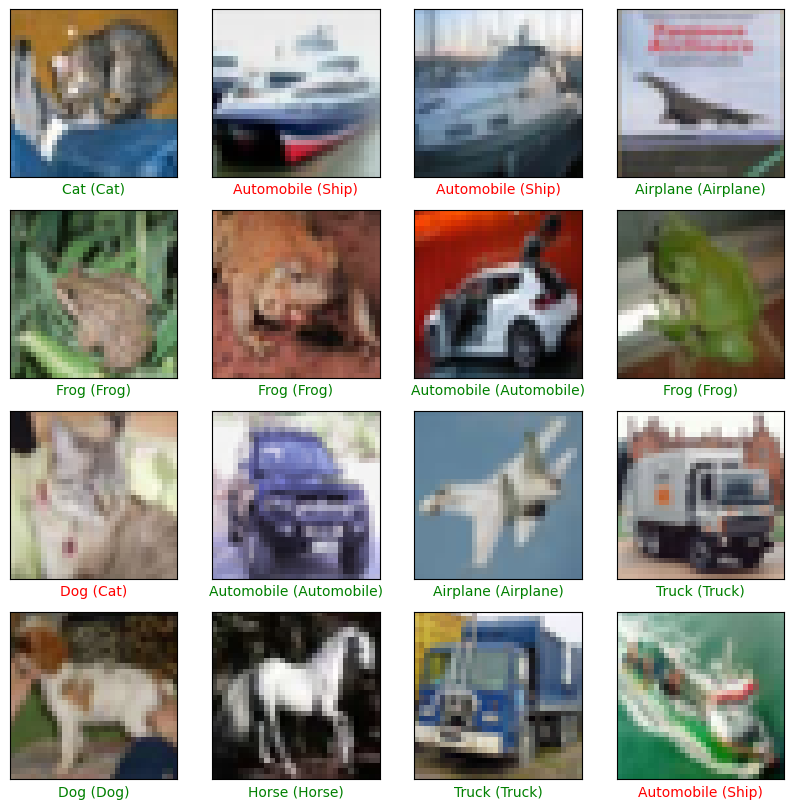

In [51]:
# Visualize predictions on the test set
plot_test_predictions(x_test, y_test, model, class_names)